# Goal: Find drivers of upsets in chess games and create a model to predict upsets 

* Upset is defined as a player with a lower rating winning a game agenst a player with a higher rating
* Model should make a predictions after having 'interviewed' each player as to thier intended opening as white and what defence they intend to use against a given opening as black

### Initial Thoughts

<br>

* Going into this project I am of two minds.

<br>

**First**
* Chess is a skill based game with no random elements (except assigning first move). 
* Because of this the player with the highest level of skill will win any game not determined by variation in player performance. 
* Because of this a given game will be won by the player with the highest level of skill a large majority of the time. * If this is true conditions underwhich variation in performance is the highest should result in the highest likelyhood of an upset.

<br>

**Second**
* It may also be the case that more skilled players are able to maintain consistancy better than less skilled players under conditions that would increased variation in thier performance.
* If this is true, those conditions may make upsets less likely as the variance would have a grater effect on the the less skilled player than on the more skilled player.

<br>

**Conclution**
* Though these two schools of thought may point at differing conclutions, both seem grounded in reason and I am eager to see what the data can tell us

### Initial Hypothisese About Drivers

* There will be few instances of upsets, possibly leading to an imbalanced data set
* As ratings for both players increase, the likelyhood of an upset will decrease 
* As the margin between player ratings increase the likelyhood of an upsets will decrease
* Shorter time incraments will increase the likelyhood of an upset
* Unranked games will have a higher likelyhood of an upset than ranked games
* Games where the higher rated player is moving the white pieces (gaining first move advantage) will have a decreased likelyhood of of an upset
* Some opening/defense stratagies may be more or less prone to upsets
* openings/defences that are more popular or perfered by higher rated players may be more/less prone to upset

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import sklearn.preprocessing

import warnings
warnings.filterwarnings("ignore")

import wrangle as w

# Acquire

* Data acquired from Kaggle at https://www.kaggle.com/datasnaek/chess
* It contained 20,058 rows and 9 columns before cleaning

# Prepare

**Data was very clean initially, I performed the following steps to insure that is was ready for exploration:**
* Removed columns that did not contain useful information\* 
* Renamed columns to premote readability\*
* Checked for nulls in the data (there were none)
* Checked that column data types were ppropriate
* Removed white space from values in object columns
* There were no rows lost during preperation
* Added Target column 'upset' indicating weather the lower rated player won the game
* Added additional features to investigate (columns that could be calculated one row at a time)*
* Split data into train, validate and test
* 
* Added additional features to investigate (columns that requiered an aggragate calculation)
* aggraget calculations were performed on train data
* resulting calculations were then applied to create columns in train, validate, and test data.

In [2]:
df = w.wrangle_chess_data(reprep = True)
df.head(1)

,rated,turns,ended_as,winning_pieces,time_code,white_rating,black_rating,opening_code,opening_name,upset,rating_dif,game_rating,lower_rated_white
0,False,13,outoftime,white,15+2,1500,1191,D10,Slav Defense: Exchange Variation,False,309,1345,False


### Examine Object Variables

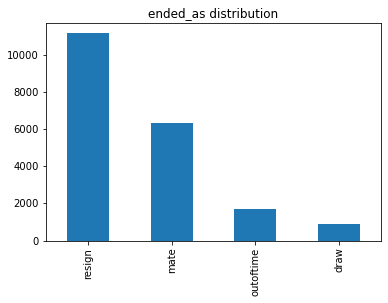

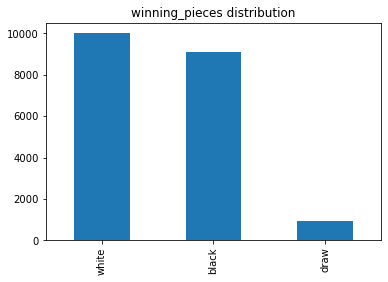

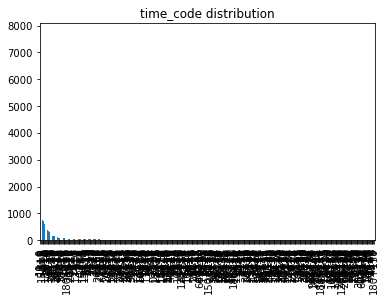

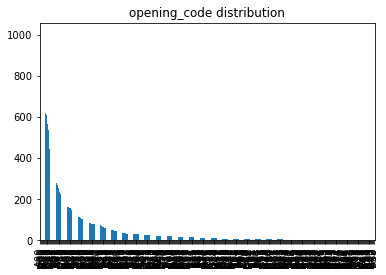

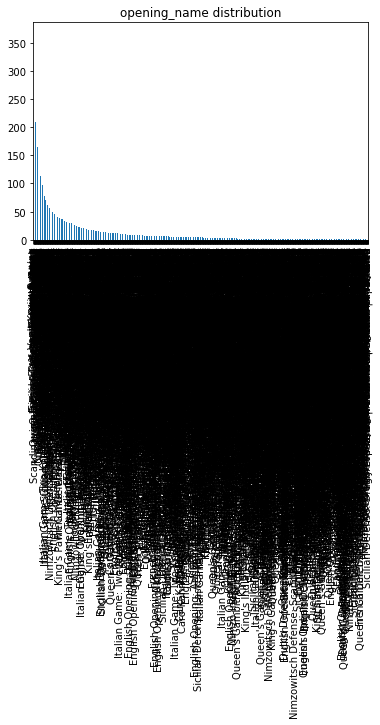

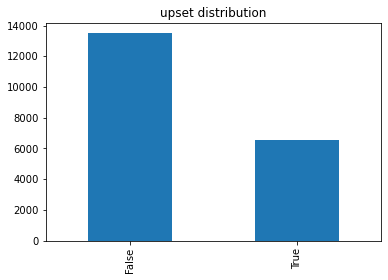

In [6]:
# distribution of the data
columns = ['ended_as', 'winning_pieces', 
           'time_code', 'opening_code', 
           'opening_name', 'upset']

for col in columns:
    
    df[col].value_counts().plot(kind='bar', title = f"{col} distribution")
    
    plt.show()

### Takeaways

* Resignations usually happen when mate is enevitable I see no reason to seperate the two
* I wonder if running out of time has an effect on upsets? 
* White does have an advantage, though it is much smaller than I thought it would be, at about 10% higher number of wins than black
* time_code, opening_code, and opening_name, have too many values to sort through at the moment and will have to be binned or pruened
* upsets represent about 1/3 or the data, which is higher than I thought it would be

### Examine Quantitative Variables

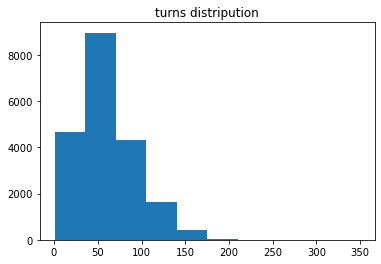

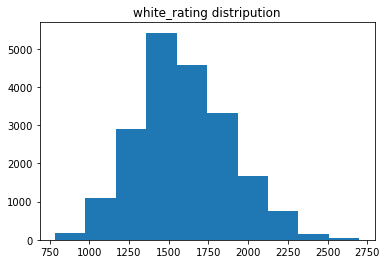

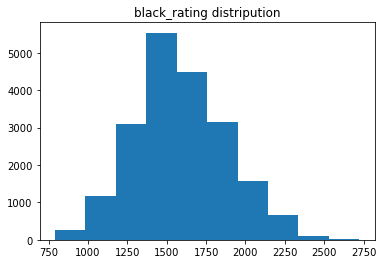

In [7]:
# distribution of the data
cols = ['turns', 'white_rating', 'black_rating']

for col in cols:
    plt.hist(df[col])
    plt.title(col+' distripution')
    plt.show()

### Takeaways

* Turns is slightly right skewed 
* Black and white rating distributions are pretty normally distributed and are nearly if not entierly identical

In [8]:
df.time_code.value_counts()

10+0       7721
15+0       1311
15+15       850
5+5         738
5+8         697
           ... 
30+45         1
35+2          1
45+8          1
4+9           1
180+150       1
Name: time_code, Length: 400, dtype: int64

### I'm goint to try to prune the object columns by removing the values that do not have a significant represintation I an setting my trial cut off point at 50 or more occurrences 

In [9]:
df.to_csv('games_preped.csv')
df = pd.read_csv('games_preped.csv')

In [10]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [11]:
df.head()

,rated,turns,ended_as,winning_pieces,time_code,white_rating,black_rating,opening_code,opening_name,upset,rating_dif,game_rating,lower_rated_white
0,False,13,outoftime,white,15+2,1500,1191,D10,Slav Defense: Exchange Variation,False,309,1345,False
1,True,16,resign,black,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,True,61,1291,False
2,True,61,mate,white,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,True,4,1498,True
3,True,61,mate,white,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,True,15,1446,True
4,True,95,mate,white,30+3,1523,1469,C41,Philidor Defense,False,54,1496,False


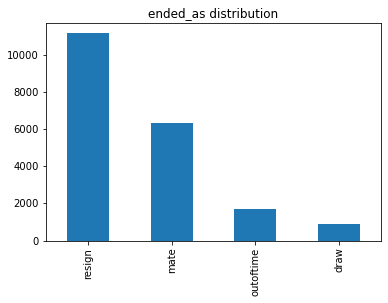

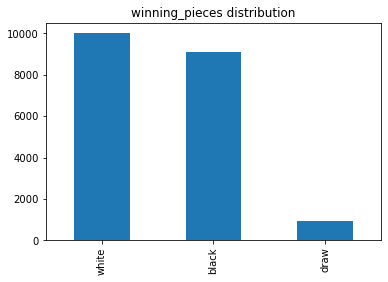

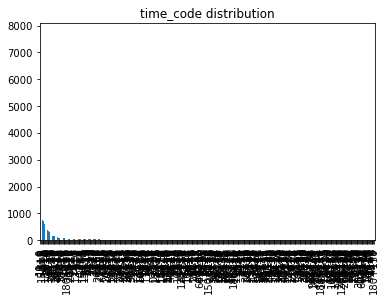

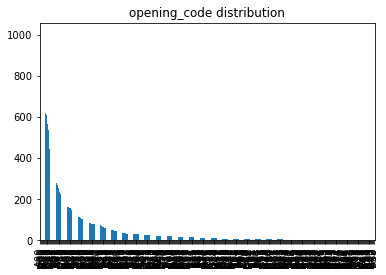

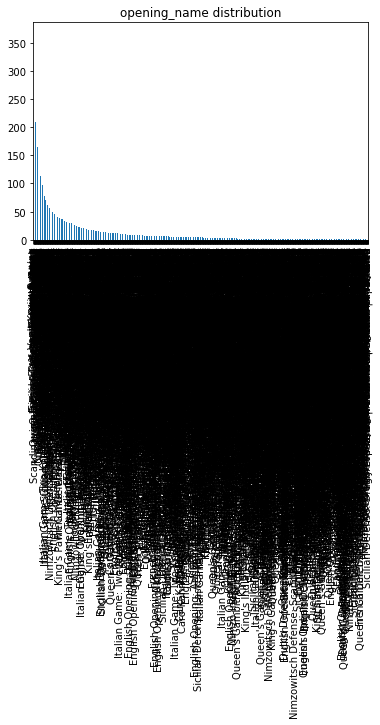

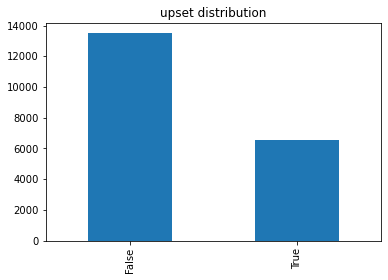

In [12]:
# distribution of the data
columns = ['ended_as', 'winning_pieces', 
           'time_code', 'opening_code', 
           'opening_name', 'upset']

for col in columns:
    
    df[col].value_counts().plot(kind='bar', title = f"{col} distribution")
    
    plt.show()

In [13]:
from wrangle import wrangle_chess_data

In [14]:
df = wrangle_chess_data()
df.head()

,rated,turns,ended_as,winning_pieces,time_code,white_rating,black_rating,opening_code,opening_name,upset,rating_dif,game_rating,lower_rated_white
0,False,13,outoftime,white,15+2,1500,1191,D10,Slav Defense: Exchange Variation,False,309,1345,False
1,True,16,resign,black,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,True,61,1291,False
2,True,61,mate,white,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,True,4,1498,True
3,True,61,mate,white,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,True,15,1446,True
4,True,95,mate,white,30+3,1523,1469,C41,Philidor Defense,False,54,1496,False


In [15]:
df['rating_diff'] = abs(df.white_rating-df.black_rating)
df.head()

,rated,turns,ended_as,winning_pieces,time_code,white_rating,black_rating,opening_code,opening_name,upset,rating_dif,game_rating,lower_rated_white,rating_diff
0,False,13,outoftime,white,15+2,1500,1191,D10,Slav Defense: Exchange Variation,False,309,1345,False,309
1,True,16,resign,black,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,True,61,1291,False,61
2,True,61,mate,white,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,True,4,1498,True,4
3,True,61,mate,white,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,True,15,1446,True,15
4,True,95,mate,white,30+3,1523,1469,C41,Philidor Defense,False,54,1496,False,54


# removing under 1200 rated players to eliminate new/novice players

In [16]:
df = df[(df.white_rating >= 1200) &(df.black_rating >= 1200)]

In [17]:
df['average_rating'] = (df.white_rating + df.black_rating) / 2

In [18]:
df

,rated,turns,ended_as,winning_pieces,time_code,white_rating,black_rating,opening_code,opening_name,upset,rating_dif,game_rating,lower_rated_white,rating_diff,average_rating
1,True,16,resign,black,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,True,61,1291,False,61,1291.5
2,True,61,mate,white,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,True,4,1498,True,4,1498.0
3,True,61,mate,white,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,True,15,1446,True,15,1446.5
4,True,95,mate,white,30+3,1523,1469,C41,Philidor Defense,False,54,1496,False,54,1496.0
6,True,33,resign,white,10+0,1520,1423,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,False,97,1471,False,97,1471.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20052,True,37,resign,white,10+10,1219,1250,A40,English Defense,True,31,1234,True,31,1234.5
20053,True,24,resign,white,10+10,1691,1220,A80,Dutch Defense,False,471,1455,False,471,1455.5
20055,True,35,mate,white,10+0,1219,1286,D00,Queen's Pawn Game: Mason Attack,True,67,1252,True,67,1252.5
20056,True,109,resign,white,10+0,1360,1227,B07,Pirc Defense,False,133,1293,False,133,1293.5


In [19]:
df['upset'] = (((df.white_rating > df.black_rating) & (df.winning_pieces == 'black')) |
               ((df.white_rating < df.black_rating) & (df.winning_pieces == 'white')))

In [20]:
df

,rated,turns,ended_as,winning_pieces,time_code,white_rating,black_rating,opening_code,opening_name,upset,rating_dif,game_rating,lower_rated_white,rating_diff,average_rating
1,True,16,resign,black,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,True,61,1291,False,61,1291.5
2,True,61,mate,white,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,True,4,1498,True,4,1498.0
3,True,61,mate,white,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,True,15,1446,True,15,1446.5
4,True,95,mate,white,30+3,1523,1469,C41,Philidor Defense,False,54,1496,False,54,1496.0
6,True,33,resign,white,10+0,1520,1423,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,False,97,1471,False,97,1471.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20052,True,37,resign,white,10+10,1219,1250,A40,English Defense,True,31,1234,True,31,1234.5
20053,True,24,resign,white,10+10,1691,1220,A80,Dutch Defense,False,471,1455,False,471,1455.5
20055,True,35,mate,white,10+0,1219,1286,D00,Queen's Pawn Game: Mason Attack,True,67,1252,True,67,1252.5
20056,True,109,resign,white,10+0,1360,1227,B07,Pirc Defense,False,133,1293,False,133,1293.5


In [21]:
df['underdog_first_move'] = df.white_rating < df.black_rating

In [22]:
df

,rated,turns,ended_as,winning_pieces,time_code,white_rating,black_rating,opening_code,opening_name,upset,rating_dif,game_rating,lower_rated_white,rating_diff,average_rating,underdog_first_move
1,True,16,resign,black,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,True,61,1291,False,61,1291.5,False
2,True,61,mate,white,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,True,4,1498,True,4,1498.0,True
3,True,61,mate,white,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,True,15,1446,True,15,1446.5,True
4,True,95,mate,white,30+3,1523,1469,C41,Philidor Defense,False,54,1496,False,54,1496.0,False
6,True,33,resign,white,10+0,1520,1423,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,False,97,1471,False,97,1471.5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20052,True,37,resign,white,10+10,1219,1250,A40,English Defense,True,31,1234,True,31,1234.5,True
20053,True,24,resign,white,10+10,1691,1220,A80,Dutch Defense,False,471,1455,False,471,1455.5,False
20055,True,35,mate,white,10+0,1219,1286,D00,Queen's Pawn Game: Mason Attack,True,67,1252,True,67,1252.5,True
20056,True,109,resign,white,10+0,1360,1227,B07,Pirc Defense,False,133,1293,False,133,1293.5,False


In [23]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.upset)

In [24]:
train, validate =  train_test_split(train_validate, test_size=.3, random_state=123, stratify=df.upset)

ValueError: Found input variables with inconsistent numbers of samples: [13920, 17400]

In [ ]:
train.size

In [ ]:
df.to_csv('games_preped.csv')
df = pd.read_csv('games_preped.csv')